### Cricket is a team sport involving a bat and ball played between two teams of eleven players each. The objective is to score more runs (points) than the opposing team. A match is divided into innings during which one team bats, two batter at a time, and the other team bowls.
### As the ICC Men’s T20 world cup has just finished, let's analysis the database of this event:

In [29]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

data = pd.read_csv("t20 world cup 22.csv")
print(data.head())
dd = pd.DataFrame(data)
selected_col = ['first innings score','first innings wickets','second innings score','second innings wickets','highest score']
df = dd

              venue        team1        team2     stage  toss winner  \
0               SCG  New Zealand    Australia  Super 12    Australia   
1     Optus Stadium  Afghanistan      England  Super 12      England   
2  Blundstone Arena      Ireland    Sri lanka  Super 12      Ireland   
3               MCG     Pakistan        India  Super 12        India   
4  Blundstone Arena   Bangladesh  Netherlands  Super 12  Netherlands   

  toss decision  first innings score  first innings wickets  \
0         Field                200.0                    3.0   
1         Field                112.0                   10.0   
2           Bat                128.0                    8.0   
3         Field                159.0                    8.0   
4         Field                144.0                    8.0   

   second innings score  second innings wickets       winner   won by  \
0                 111.0                    10.0  New Zealand     Runs   
1                 113.0                   

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   venue                   33 non-null     object 
 1   team1                   33 non-null     object 
 2   team2                   33 non-null     object 
 3   stage                   33 non-null     object 
 4   toss winner             30 non-null     object 
 5   toss decision           30 non-null     object 
 6   first innings score     30 non-null     float64
 7   first innings wickets   30 non-null     float64
 8   second innings score    30 non-null     float64
 9   second innings wickets  30 non-null     float64
 10  winner                  29 non-null     object 
 11  won by                  29 non-null     object 
 12  player of the match     29 non-null     object 
 13  top scorer              30 non-null     object 
 14  highest score           30 non-null     floa

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
first innings score,30.0,153.366667,30.440992,79.0,134.00,157.0,179.00,205.0
first innings wickets,30.0,6.866667,2.096521,2.0,5.25,7.5,8.00,10.0
second innings score,30.0,130.800000,25.511863,51.0,113.50,136.0,147.75,170.0
second innings wickets,30.0,6.233333,3.013571,0.0,5.00,6.0,9.00,10.0
highest score,30.0,64.066667,17.264541,32.0,52.50,62.0,70.25,109.0


In [32]:
figure = px.bar(data, 
                x=data["winner"],
                title="Number of Matches Won by teams in t20 World Cup 2022")
figure.show()

### As England won the t20 world cup 2022, England won five matches. And Both Pakistan and India won 4 matches.

In [33]:
won_by = data["won by"].value_counts()
label = won_by.index
counts = won_by.values
colors = ['red','green']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Number of Matches Won By Runs Or Wickets')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

### So in the t20 world cup 2022, 16 matches were won by batting first, and 13 matches were won by chasing.

In [34]:
toss = data["toss decision"].value_counts()
label = toss.index
counts = toss.values
colors = ['blue','pink']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Toss Decisions in t20 World Cup 2022')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

### So in 17 matches, the teams decided to bat first, and in 13 matches, the teams chose to field first.

In [35]:
figure = px.bar(data, 
                x=data["top scorer"], 
                y = data["highest score"], 
                color = data["highest score"],
                title="Top Scorers in t20 World Cup 2022")
figure.show()

### Virat Kohli scored the highest in 3 matches. Undoubtedly, he was the best batsman in the t20 world cup 2022. 

In [36]:
figure = px.bar(data, 
                x = data["player of the match"], 
                title="Player of the Match Awards in t20 World Cup 2022")
figure.show()

### Virat Kohli, Sam Curran, Taskin Ahmed, Suryakumar Yadav, and Shadab Khan got the player of the match in 2 matches. No player got the player of the match award in more than two matches.

In [37]:
figure = px.bar(data, 
                x=data["best bowler"],
                title="Best Bowlers in t20 World Cup 2022")
figure.show()

### Sam Curran was the only best bowler in 3 matches. Undoubtedly, he deserved to be the player of the tournament.

In [38]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["venue"],
    y=data["first innings score"],
    name='First Innings Runs',
    marker_color='skyblue'
))
fig.add_trace(go.Bar(
    x=data["venue"],
    y=data["second innings score"],
    name='Second Innings Runs',
    marker_color='lightgreen'
))
fig.update_layout(barmode='group', 
                  xaxis_tickangle=-45, 
                  title="Best Stadiums to Bat First or Chase")
fig.show()

### SCG was the only stadium in the world cup that was best for batting first. Other stadiums didn’t make much difference while batting first or chasing.

In [39]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["venue"],
    y=data["first innings wickets"],
    name='First Innings Wickets',
    marker_color='silver'
))
fig.add_trace(go.Bar(
    x=data["venue"],
    y=data["second innings wickets"],
    name='Second Innings Wickets',
    marker_color='orange'
))
fig.update_layout(barmode='group', 
                  xaxis_tickangle=-45, 
                  title="Best Statiums to Bowl First or Defend")
fig.show()

### SCG was the best stadium to bowl while defending the target. While the Optus Stadium was the best stadium to bowl first.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   venue                   33 non-null     object 
 1   team1                   33 non-null     object 
 2   team2                   33 non-null     object 
 3   stage                   33 non-null     object 
 4   toss winner             30 non-null     object 
 5   toss decision           30 non-null     object 
 6   first innings score     30 non-null     float64
 7   first innings wickets   30 non-null     float64
 8   second innings score    30 non-null     float64
 9   second innings wickets  30 non-null     float64
 10  winner                  29 non-null     object 
 11  won by                  29 non-null     object 
 12  player of the match     29 non-null     object 
 13  top scorer              30 non-null     object 
 14  highest score           30 non-null     floa

In [41]:
# replace missing values with the average
for cc in selected_col:
    dd[cc].fillna(dd[cc].mean(), inplace=True)
df = dd
df = df.fillna(0)    # to change the NAN to 0

In [42]:
import matplotlib.pyplot as plt
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   venue                   33 non-null     object 
 1   team1                   33 non-null     object 
 2   team2                   33 non-null     object 
 3   stage                   33 non-null     object 
 4   toss winner             33 non-null     object 
 5   toss decision           33 non-null     object 
 6   first innings score     33 non-null     float64
 7   first innings wickets   33 non-null     float64
 8   second innings score    33 non-null     float64
 9   second innings wickets  33 non-null     float64
 10  winner                  33 non-null     object 
 11  won by                  33 non-null     object 
 12  player of the match     33 non-null     object 
 13  top scorer              33 non-null     object 
 14  highest score           33 non-null     floa

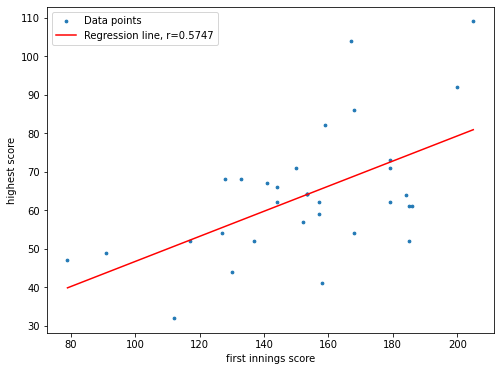

In [43]:
fr = df['first innings score']
hs = df['highest score']
a = (np.mean(fr * hs) - np.mean(fr) * np.mean(hs)) / np.var(fr)
b = np.mean(hs) - a * np.mean(fr)
r = np.corrcoef(fr, hs)[0, 1]
plt.figure(figsize=(8,6))
plt.scatter(fr, hs, marker='.', s=30, label='Data points')

# regression line
x_r = np.arange(min(fr), max(fr), 0.01)
plt.plot(x_r, a * x_r + b, 'r', label=f'Regression line, r={round(r, 4)}')
plt.xlabel('first innings score')
plt.ylabel('highest score')
plt.legend()
plt.show()

/tmp/ipykernel_7331/3805577767.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



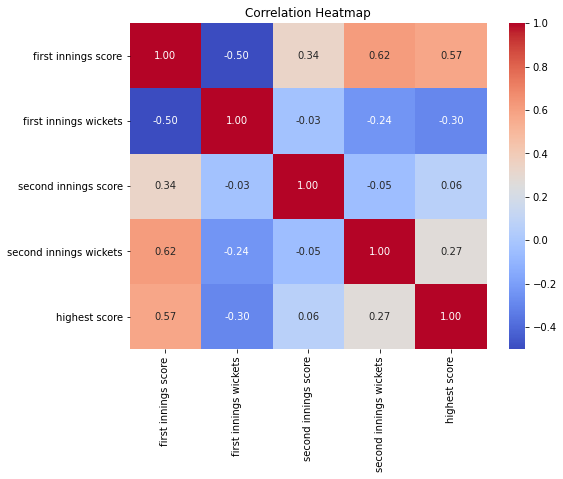

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the plot
plt.title("Correlation Heatmap")
plt.show()


In [47]:
X = df[['first innings score', 'second innings score']]
y = df['highest score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


user_input = [[112,100]]  

# Make a prediction
predicted_s = model.predict(user_input)

# Display the predicted
print(f'Predicted Score: {predicted_s[0]}')

Predicted Score: 51.694517322013255


/home/lab/.local/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

